=== Instalasi PySpark ===
✓ PySpark berhasil diinstal!

=== Inisialisasi Spark Session ===
✓ Spark Session berhasil dibuat!

=== Memuat Dataset Diamonds ===
Jumlah baris di Pandas DF: 53940

Sampel 5 baris pertama:
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

=== Konversi ke Spark DataFrame ===
5 baris pertama dalam Spark DataFrame:
+-----+-------+-----+-------+-----+-----+-----+----+----+----+
|carat|    cut|color|clarity|depth|table|price|   x|   y|   z|
+-----+-------+-----+-------+-----+-----+-----+----+----+----+
| 0.23|  Ideal|    E|    SI2| 61.5| 55.0|  326|3.95|3.98|2.43|
| 0.21|Premium|    E|    SI1| 5

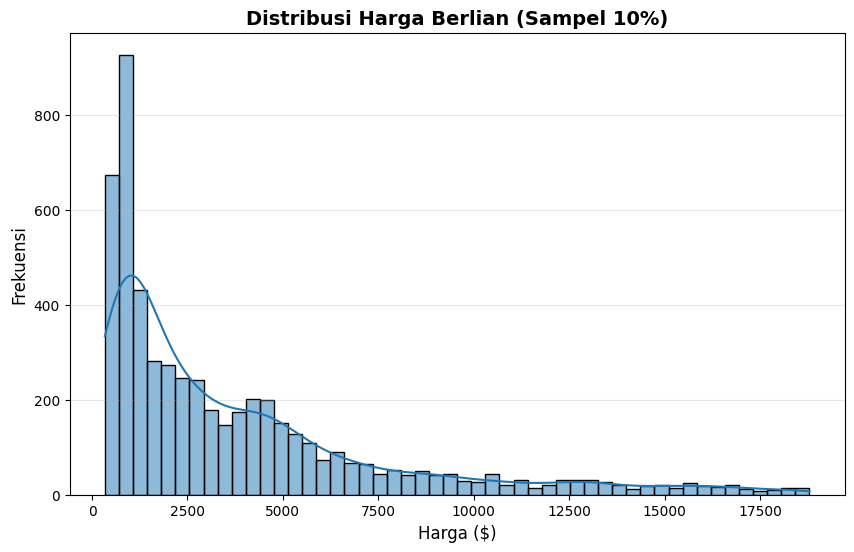

📊 Analisis Visual:
   Data terlihat miring ke kanan (positive skew)
   'Ekor' panjang ada di sisi kanan (harga mahal)
   Ini berarti Mean > Median

=== Konfirmasi Skewness dengan Perhitungan ===
+------------------+
|    skewness_harga|
+------------------+
|1.6183502776052823|
+------------------+

Nilai Skewness: 1.6184
✓ Positive Skew - Data miring ke kanan

=== Membuat Visualisasi Box Plot ===


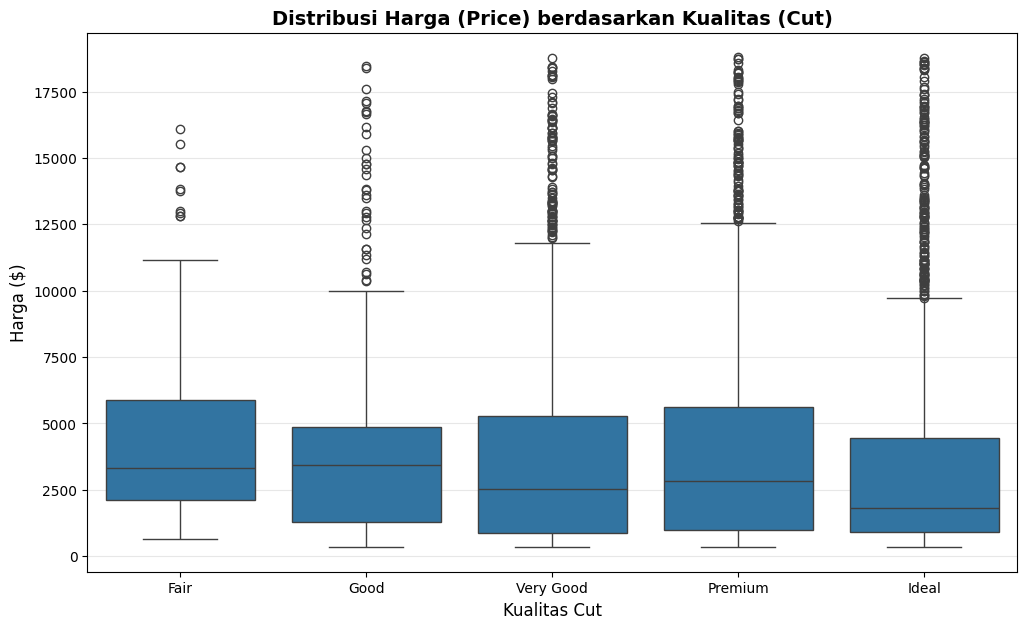

📊 Analisis Box Plot:
   - Kotak: Menunjukkan IQR (Q1 hingga Q3)
   - Garis di dalam kotak: Median
   - Titik-titik di luar 'kumis': Outliers
   - Insight: Meskipun 'Ideal' adalah cut terbaik,
     median harganya tidak setinggi 'Premium'!

BAGIAN LATIHAN

=== LATIHAN 1: Statistik Deskriptif untuk Kolom 'carat' ===
+------------------+------------------+
|        mean_carat|      stddev_carat|
+------------------+------------------+
|0.7979397478679908|0.4740112444054214|
+------------------+------------------+

Median Carat (aproksimasi): 0.7000

=== LATIHAN 2: Perbandingan Harga untuk Color 'D' vs 'J' ===
Rata-rata harga untuk color 'D': $3,169.95
Rata-rata harga untuk color 'J': $5,323.82

✓ Color 'J' lebih mahal dengan selisih $2,153.86

=== LATIHAN 3: Histogram untuk Kolom 'depth' ===


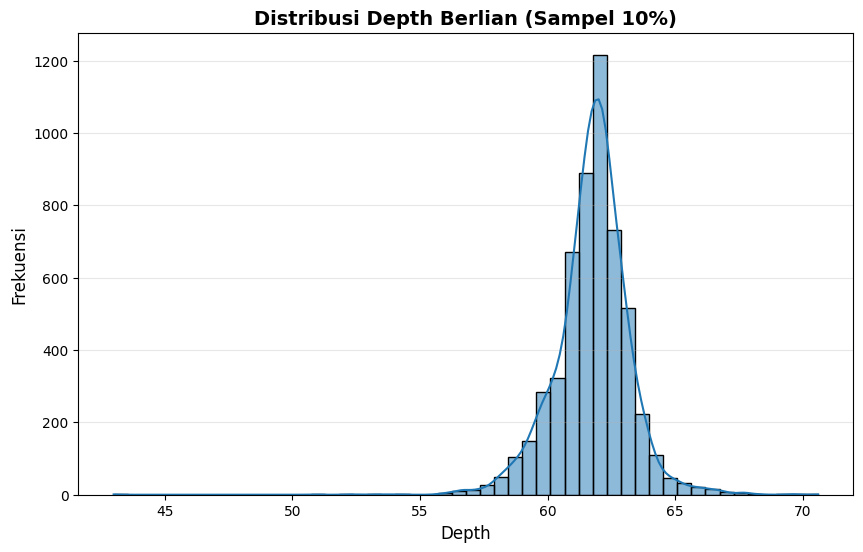

Nilai Skewness untuk 'depth': -0.0823

📊 Analisis Distribusi 'depth':
   ✓ Distribusi terlihat NORMAL (mendekati simetris)

KESIMPULAN PRAKTIKUM

✓ Berhasil menjalankan PySpark di Google Colab
✓ Berhasil menghitung statistik deskriptif dengan .describe() dan sql.functions
✓ Memahami trade-off Median: Aproksimasi vs Eksak
✓ Berhasil membuat visualisasi Histogram dan Box Plot
✓ Mengidentifikasi distribusi data, skewness, dan outliers

📚 Pembelajaran Kunci:
   1. PySpark cocok untuk data skala besar
   2. Sampling penting untuk visualisasi
   3. Trade-off antara kecepatan dan akurasi dalam Big Data
   4. Visualisasi membantu memahami pola data

=== Menutup Spark Session ===
✓ Spark Session ditutup

🎉 Praktikum Selesai! 🎉


In [1]:
# ============================================================================
# MODUL PRAKTIKUM 5: ANALISIS STATISTIK DESKRIPTIF DENGAN PYSPARK
# Universitas Pelita Bangsa - Teknik Informatika
# ============================================================================

# ============================================================================
# BAGIAN 1: PERSIAPAN LINGKUNGAN
# ============================================================================

# Langkah 1.1: Instalasi PySpark
print("=== Instalasi PySpark ===")
!pip install pyspark findspark -q
print("✓ PySpark berhasil diinstal!\n")

# Langkah 1.2: Inisialisasi SparkSession
print("=== Inisialisasi Spark Session ===")
import findspark
findspark.init()

from pyspark.sql import SparkSession

# Membuat Spark Session
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("PraktikumStatistikDeskriptif") \
    .getOrCreate()

print("✓ Spark Session berhasil dibuat!")
print(spark)
print()

# ============================================================================
# BAGIAN 2: MEMUAT DAN EKSPLORASI DATA
# ============================================================================

# Langkah 2.1: Muat Dataset ke Pandas
print("=== Memuat Dataset Diamonds ===")
import seaborn as sns

# Muat dataset 'diamonds' dari seaborn
pandas_df = sns.load_dataset('diamonds')
print(f"Jumlah baris di Pandas DF: {len(pandas_df)}")
print("\nSampel 5 baris pertama:")
print(pandas_df.head())
print()

# Langkah 2.2: Konversi Pandas DF ke Spark DF
print("=== Konversi ke Spark DataFrame ===")
df = spark.createDataFrame(pandas_df)

# Tampilkan 5 baris pertama
print("5 baris pertama dalam Spark DataFrame:")
df.show(5)

# Tampilkan skema (tipe data) dari setiap kolom
print("\nSkema DataFrame:")
df.printSchema()
print()

# ============================================================================
# BAGIAN 3: ANALISIS STATISTIK DESKRIPTIF
# ============================================================================

# Langkah 3.1: Cara Mudah dengan .describe()
print("=== Statistik Deskriptif Dasar dengan .describe() ===")
df_described = df.describe()
df_described.show()
print()

# Langkah 3.2: Statistik Spesifik dengan pyspark.sql.functions
print("=== Statistik Spesifik untuk Kolom 'price' ===")
from pyspark.sql.functions import mean, stddev, variance, min, max, col

price_stats = df.select(
    mean(col("price")).alias("mean_price"),
    stddev(col("price")).alias("stddev_price"),
    variance(col("price")).alias("variance_price"),
    min(col("price")).alias("min_price"),
    max(col("price")).alias("max_price")
)
price_stats.show()
print()

# Langkah 3.3: Menghitung Modus (Mode)
print("=== Menghitung Modus untuk Kolom 'cut' ===")
from pyspark.sql.functions import desc

mode_cut = df.groupBy("cut") \
    .count() \
    .orderBy(desc("count"))

print("Modus untuk kolom 'cut' (nilai yang paling sering muncul):")
mode_cut.show(1)

print("Semua nilai 'cut' dan frekuensinya:")
mode_cut.show()
print()

# Langkah 3.4: Tantangan Median (Aproksimasi vs. Eksak)
print("=== Menghitung Median dengan Berbagai Metode ===")

# Metode 1: Menggunakan .summary()
print("1. Aproksimasi Median dari .summary():")
median_approx = df.summary("50%")
median_approx.show()

# Metode 2: Menggunakan approxQuantile dengan error 0.01 (1%)
median_quantile = df.approxQuantile("price", [0.5], 0.01)
print(f"\n2. Aproksimasi Median (error 0.01) dari approxQuantile: {median_quantile[0]}")

# Metode 3: Menggunakan approxQuantile dengan error 0.0 (eksak)
median_exact = df.approxQuantile("price", [0.5], 0.0)
print(f"3. Median Eksak (error 0.0) dari approxQuantile: {median_exact[0]}")

print("\n📊 Analisis:")
print(f"   - Median Aproksimasi (summary): Lihat tabel di atas")
print(f"   - Median Aproksimasi (error 1%): ${median_quantile[0]:,.2f}")
print(f"   - Median Eksak: ${median_exact[0]:,.2f}")
print()

# ============================================================================
# BAGIAN 4: ANALISIS DISTRIBUSI DATA
# ============================================================================

# Langkah 4.1: Sampling Data
print("=== Sampling Data untuk Visualisasi ===")
sampled_df = df.sample(withReplacement=False, fraction=0.1, seed=42)

# Langkah 4.2: Konversi Spark DF (Sampel) ke Pandas DF
viz_pandas_df = sampled_df.toPandas()
print(f"Ukuran data asli: {df.count()} baris")
print(f"Ukuran data sampel: {len(viz_pandas_df)} baris")
print()

# Langkah 4.3: Visualisasi Histogram
print("=== Membuat Visualisasi Histogram ===")
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(viz_pandas_df['price'], kde=True, bins=50)
plt.title('Distribusi Harga Berlian (Sampel 10%)', fontsize=14, fontweight='bold')
plt.xlabel('Harga ($)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

print("📊 Analisis Visual:")
print("   Data terlihat miring ke kanan (positive skew)")
print("   'Ekor' panjang ada di sisi kanan (harga mahal)")
print("   Ini berarti Mean > Median")
print()

# Langkah 4.4: Konfirmasi Skewness dengan Angka
print("=== Konfirmasi Skewness dengan Perhitungan ===")
from pyspark.sql.functions import skewness

skewness_result = df.select(skewness("price").alias("skewness_harga"))
skewness_result.show()

skewness_value = skewness_result.collect()[0]['skewness_harga']
print(f"Nilai Skewness: {skewness_value:.4f}")
if skewness_value > 0:
    print("✓ Positive Skew - Data miring ke kanan")
elif skewness_value < 0:
    print("✓ Negative Skew - Data miring ke kiri")
else:
    print("✓ Symmetric - Data simetris")
print()

# Langkah 4.5: Visualisasi Box Plot
print("=== Membuat Visualisasi Box Plot ===")
plt.figure(figsize=(12, 7))
sns.boxplot(data=viz_pandas_df, x='cut', y='price',
            order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.title('Distribusi Harga (Price) berdasarkan Kualitas (Cut)',
          fontsize=14, fontweight='bold')
plt.xlabel('Kualitas Cut', fontsize=12)
plt.ylabel('Harga ($)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

print("📊 Analisis Box Plot:")
print("   - Kotak: Menunjukkan IQR (Q1 hingga Q3)")
print("   - Garis di dalam kotak: Median")
print("   - Titik-titik di luar 'kumis': Outliers")
print("   - Insight: Meskipun 'Ideal' adalah cut terbaik,")
print("     median harganya tidak setinggi 'Premium'!")
print()

# ============================================================================
# BAGIAN 5: LATIHAN
# ============================================================================

print("=" * 70)
print("BAGIAN LATIHAN")
print("=" * 70)
print()

# Latihan 1: Statistik untuk kolom 'carat'
print("=== LATIHAN 1: Statistik Deskriptif untuk Kolom 'carat' ===")

carat_stats = df.select(
    mean(col("carat")).alias("mean_carat"),
    stddev(col("carat")).alias("stddev_carat")
)
carat_stats.show()

# Median carat
median_carat = df.approxQuantile("carat", [0.5], 0.01)
print(f"Median Carat (aproksimasi): {median_carat[0]:.4f}")
print()

# Latihan 2: Bandingkan harga untuk color 'D' vs 'J'
print("=== LATIHAN 2: Perbandingan Harga untuk Color 'D' vs 'J' ===")

color_d_avg = df.filter(col("color") == "D").select(mean(col("price")).alias("avg_price_D"))
color_j_avg = df.filter(col("color") == "J").select(mean(col("price")).alias("avg_price_J"))

avg_d = color_d_avg.collect()[0]['avg_price_D']
avg_j = color_j_avg.collect()[0]['avg_price_J']

print(f"Rata-rata harga untuk color 'D': ${avg_d:,.2f}")
print(f"Rata-rata harga untuk color 'J': ${avg_j:,.2f}")

if avg_d > avg_j:
    print(f"\n✓ Color 'D' lebih mahal dengan selisih ${avg_d - avg_j:,.2f}")
else:
    print(f"\n✓ Color 'J' lebih mahal dengan selisih ${avg_j - avg_d:,.2f}")
print()

# Latihan 3: Histogram untuk kolom 'depth'
print("=== LATIHAN 3: Histogram untuk Kolom 'depth' ===")

plt.figure(figsize=(10, 6))
sns.histplot(viz_pandas_df['depth'], kde=True, bins=50)
plt.title('Distribusi Depth Berlian (Sampel 10%)', fontsize=14, fontweight='bold')
plt.xlabel('Depth', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Hitung skewness untuk depth
depth_skewness = df.select(skewness("depth").alias("skewness_depth"))
depth_skew_value = depth_skewness.collect()[0]['skewness_depth']

print(f"Nilai Skewness untuk 'depth': {depth_skew_value:.4f}")
print("\n📊 Analisis Distribusi 'depth':")
if abs(depth_skew_value) < 0.5:
    print("   ✓ Distribusi terlihat NORMAL (mendekati simetris)")
elif depth_skew_value > 0.5:
    print("   ✓ Distribusi SKEWED ke kanan (positive skew)")
else:
    print("   ✓ Distribusi SKEWED ke kiri (negative skew)")
print()

# ============================================================================
# BAGIAN 6: KESIMPULAN
# ============================================================================

print("=" * 70)
print("KESIMPULAN PRAKTIKUM")
print("=" * 70)
print()
print("✓ Berhasil menjalankan PySpark di Google Colab")
print("✓ Berhasil menghitung statistik deskriptif dengan .describe() dan sql.functions")
print("✓ Memahami trade-off Median: Aproksimasi vs Eksak")
print("✓ Berhasil membuat visualisasi Histogram dan Box Plot")
print("✓ Mengidentifikasi distribusi data, skewness, dan outliers")
print()
print("📚 Pembelajaran Kunci:")
print("   1. PySpark cocok untuk data skala besar")
print("   2. Sampling penting untuk visualisasi")
print("   3. Trade-off antara kecepatan dan akurasi dalam Big Data")
print("   4. Visualisasi membantu memahami pola data")
print()

# Tutup Spark Session
print("=== Menutup Spark Session ===")
spark.stop()
print("✓ Spark Session ditutup")
print("\n🎉 Praktikum Selesai! 🎉")